In [3]:

import pandas as pd
import numpy as np
from src.H_FFS import FFS, H_FFS

In [4]:
import time

In [3]:
df = pd.read_csv('./data/tic/ticdata2000.txt',header=None, sep='\t')
df = df.fillna(0)
df.columns = [str(col) for col in df.columns]

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [15]:
def make_dt(**params):
    return DecisionTreeClassifier(**params)
def make_KNN(**params):
    return KNeighborsClassifier(**params)
def make_naive_bayes(**params):
    return GaussianNB(**params)
def make_rf(**params):
    return RandomForestClassifier(**params)

In [16]:
dict_clf = {
    'decision tree':{
        'maker':make_dt,
        'params':{}
    },
    'knn':{
        'maker':make_KNN,
        'params':{}
    },
    'naive bayes':{
        'maker':make_naive_bayes,
        'params':{}
    }
}

In [7]:
hybrid_list = ['ANOVA', 'MRMR', 'FCBF']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('85',axis=1), df['85'], test_size=0.2)

In [10]:
for hybrid in hybrid_list:
    for key in dict_clf:
        start_time = time.time()
        print(key, hybrid)
        hffs = H_FFS(dict_clf[key]['maker'], dict_clf[key]['params'], K=X_train.shape[1],C=5, method=hybrid)
        hffs.fit(X_train,y_train, X_val, y_val)
        res_df = pd.DataFrame(hffs.results_).T
        res_df.to_csv('./hasil_eksperimen/COIL2000_hybrid_{}_{}.csv'.format(hybrid,key))
        print('\tdone: ', time.time() - start_time)

decision tree ANOVA
	done:  12.472946405410767
knn ANOVA
	done:  125.13860416412354
naive bayes ANOVA
	done:  4.02306866645813
decision tree MRMR
	done:  61.30178999900818
knn MRMR
	done:  201.63089871406555
naive bayes MRMR
	done:  42.361918687820435
decision tree FCBF
	done:  30.044418334960938
knn FCBF
	done:  93.18593621253967
naive bayes FCBF
	done:  14.21312665939331


In [11]:
for key in dict_clf:
    print(key)
    start_time = time.time()    
    ffs = FFS(dict_clf[key]['maker'], dict_clf[key]['params'], K=X_train.shape[1])
    ffs.fit(X_train,y_train, X_val, y_val)
    res_df = pd.DataFrame(ffs.results_).T
    res_df.to_csv('./hasil_eksperimen/COIL2000_original_{}.csv'.format(key))
    print('\tdone: ', time.time() - start_time)

decision tree
	done:  77.59338569641113
knn
	done:  526.5956194400787
naive bayes
	done:  20.66863179206848


In [7]:
import os

In [10]:
eksp_dir = './hasil_eksperimen/'

In [54]:
df_dict = {key:{} for key in dict_clf}

In [55]:
for key in dict_clf:
    for k in os.listdir(eksp_dir):
        if key in k:
            df_dict[key][' '.join(k.split('_')[1:-1])] = pd.read_csv(eksp_dir + k, index_col=0)

In [56]:
from matplotlib import pyplot as plt

In [67]:
for k in df_dict[key]:
    print(k)

hybrid FCBF
hybrid ANOVA
original
hybrid MRMR


In [68]:
color = {
    'original': 'black',
    'hybrid FCBF': 'blue',
    'hybrid ANOVA': 'red',
    'hybrid MRMR': 'green'
}

In [122]:
avg_scores_total_time = {}
for k in color:
    for key in df_dict:
        avg_scores_total_time[k + ' ' + key] = {}
        avg_scores_total_time[k + ' ' + key]['rata-rata BCR'] = np.average(df_dict[key][k]['score'])
        avg_scores_total_time[k + ' ' + key]['total waktu eksekusi'] = df_dict[key][k]['total_time'][85]

In [127]:
avg_scores_total_time_all = {k:{} for k in color}
for k in color:
    avg_scores_total_time_all[k]['rata-rata BCR'] = np.average(sum([df_dict[key][k]['score'] for key in df_dict])/3)
    avg_scores_total_time_all[k]['total waktu eksekusi'] = sum (df_dict[key][k]['total_time'][85] for key in df_dict)

In [128]:
pd.DataFrame(avg_scores_total_time).T

,rata-rata BCR,total waktu eksekusi
hybrid ANOVA decision tree,0.507967,12.458099
hybrid ANOVA knn,0.501482,125.123589
hybrid ANOVA naive bayes,0.563420,4.007348
hybrid FCBF decision tree,0.556605,30.029216
hybrid FCBF knn,0.516464,93.171453
hybrid FCBF naive bayes,0.647941,14.198841
hybrid MRMR decision tree,0.563389,61.289772
hybrid MRMR knn,0.517771,201.614776
hybrid MRMR naive bayes,0.609055,42.347624
original decision tree,0.574018,77.585993


In [129]:
pd.DataFrame(avg_scores_total_time_all).T

,rata-rata BCR,total waktu eksekusi
hybrid ANOVA,0.524289,141.589036
hybrid FCBF,0.573670,137.399511
hybrid MRMR,0.563405,305.252171
original,0.582540,624.836976


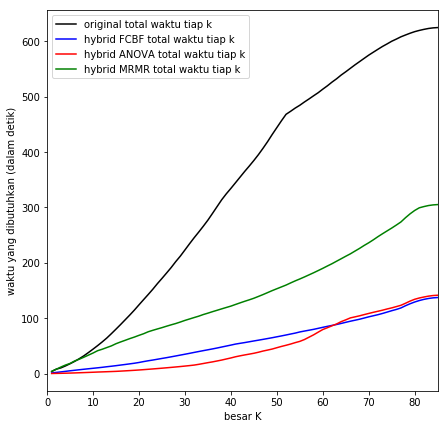

In [132]:
plt.figure(figsize=(7,7))
for k in color:
    plt.plot(df_dict[key][k]['k'], sum([df_dict[key][k]['total_time'] for key in df_dict]), label=k + ' total waktu tiap k', color=color[k])
    plt.xlim(0, len(df_dict[key][k]['k']))
plt.ylabel('waktu yang dibutuhkan (dalam detik)')
plt.xlabel('besar K')
plt.legend()
plt.show()

decision tree


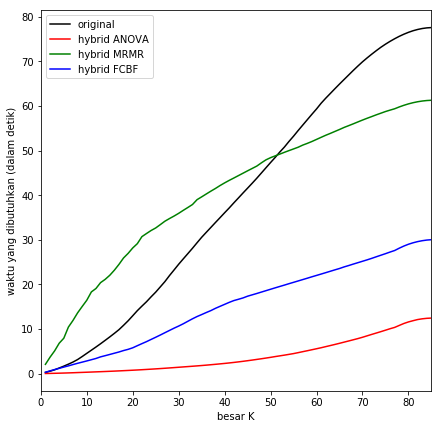

knn


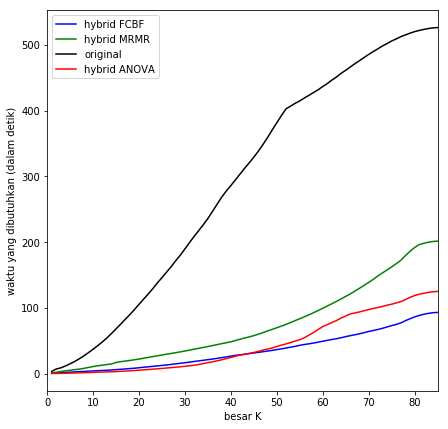

naive bayes


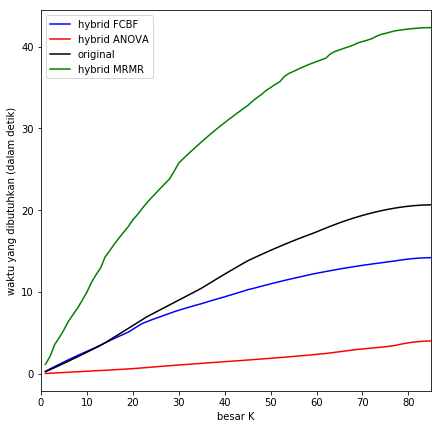

In [121]:
for key in df_dict:
    print(key)
    plt.figure(figsize=(7,7))
    for k in df_dict[key]:
        plt.plot(df_dict[key][k]['k'], df_dict[key][k]['total_time'], label=k, color=color[k])
        plt.xlim(0, len(df_dict[key][k]['k']))
    plt.ylabel('waktu yang dibutuhkan (dalam detik)')
    plt.xlabel('besar K')
    plt.legend()
    plt.show()